# Tech challenge | Cristiane Carneiro 

## Import libraries

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LinReg   
from sklearn.linear_model import Lasso        
from sklearn.linear_model import Ridge        
from sklearn.linear_model import ElasticNet   
from sklearn.metrics import mean_squared_error as mse 

## Import files

In [138]:
data1 = pd.read_csv('data/measurements.csv')

In [139]:
data2 = pd.read_excel('data/measurements2.xlsx')

## Explore files

In [140]:
data1.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [141]:
data1.shape

(388, 12)

In [142]:
data2.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [143]:
data2.shape

(388, 12)

Based on the above, the files might contain the same info. We will review it shortly.

### Data types 

In [144]:
#we will need to manage some null-values and review data types. 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [145]:
#convert object columns to float
columns_to_convert = ['distance', 'consume','temp_inside','refill liters']

In [146]:
#replace ',' by '.'
data1[columns_to_convert] = data1[columns_to_convert].replace(',', '.', regex=True)

In [147]:
#convert data type
data1[columns_to_convert] = data1[columns_to_convert].astype(float)

In [148]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [149]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [150]:
#both data sets are the same, we will use d2
are_equal = data1.equals(data2)

if are_equal:
    print("All values in data1 and data2 are the same.")
else:
    print("Values in data1 and data2 are different.")

All values in data1 and data2 are the same.


### Null values

In [151]:
na_values = data2.isnull().sum()
na_values[na_values>1]

temp_inside       12
specials         295
refill liters    375
refill gas       375
dtype: int64

In [152]:
na_values = data2.isnull().mean() * 100
na_values[na_values>0]

temp_inside       3.092784
specials         76.030928
refill liters    96.649485
refill gas       96.649485
dtype: float64

Three columns have 75%+ of null values. Let us look into them. 

#### specials

In [153]:
data2.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [154]:
data2.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

For the 'specials' column, we can assume the null values represent that the car do not have specials (although, had we had Cobify's contacts, it would be worth double checking it with them). We see the values are not standardized, but let us look into it later (it seems this column has similar info than columns AC, rain, sum. 

In [155]:
data2['specials'] = data2['specials'].fillna('no specials')

#### temp_inside

In [156]:
data2.temp_inside.unique()

array([21.5, 22.5, 20. ,  nan, 21. , 20.5, 23. , 23.5, 25. , 24. , 22. ,
       19. , 24.5, 25.5])

In [157]:
#there are just 3% of them, let us delete them 
bad_index = data2.temp_inside[data2.temp_inside.isna()].index

In [158]:
data2.drop(bad_index, axis=0, inplace=True)

#### refill gas

In [159]:
#the null values are associated with gas_type E10 and SP98
data2['gas_type'][data2['refill liters'].isnull()].unique()

array(['E10', 'SP98'], dtype=object)

In [160]:
#those are in fact the only type in the database
data2['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [161]:
#column refill_gas seems to be the same as gas_type, will drop
data2[data2['gas_type']=='SP98'].head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
44,5.4,3.3,32,21.5,7,no specials,SP98,0,0,0,37.6,SP98
45,2.0,9.9,21,21.5,4,no specials,SP98,0,0,0,NaN,NaN
46,14.2,5.1,32,21.5,7,no specials,SP98,0,0,0,NaN,NaN
47,16.0,4.9,25,21.5,8,no specials,SP98,0,0,0,NaN,NaN
48,11.8,4.9,25,21.5,11,no specials,SP98,0,0,0,NaN,NaN


In [162]:
data2.drop(columns=['refill gas'],axis=1,inplace=True)

#### refill liters

In [163]:
#over 96% null, will drop
data2[data2['refill liters'].notnull()].head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
0,28.0,5.0,26,21.5,12,no specials,E10,0,0,0,45.0
44,5.4,3.3,32,21.5,7,no specials,SP98,0,0,0,37.6
82,10.5,3.6,42,20.0,10,no specials,SP98,0,0,0,37.7
106,162.7,5.5,75,23.0,1,no specials,SP98,0,0,0,45.0
139,16.1,5.4,24,21.5,7,rain,E10,0,1,0,38.0


In [164]:
data2.drop(columns=['refill liters'],axis=1,inplace=True)

## Transform

### specials

In [165]:
data2.specials.unique()

array(['no specials', 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [166]:
#let us add a column for snow as well 
data2['snow'] = 0

In [167]:
data2['snow'] = data2['specials'].str.split(' ').apply(lambda x: 1 if 'snow' in x else 0)

In [168]:
data2[data2['specials']=='half rain half sun'].head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,snow
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,0


In [169]:
data2.loc[data2['specials'] == 'half rain half sun', 'sun'] = 1

In [170]:
data2.drop(columns=['specials'],axis=1,inplace=True)

In [171]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0


In [172]:
data2 = pd.get_dummies(data2, columns=['gas_type'], prefix='gas')

In [173]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow,gas_E10,gas_SP98
0,28.0,5.0,26,21.5,12,0,0,0,0,True,False
1,12.0,4.2,30,21.5,13,0,0,0,0,True,False
2,11.2,5.5,38,21.5,15,0,0,0,0,True,False
3,12.9,3.9,36,21.5,14,0,0,0,0,True,False
4,18.5,4.5,46,21.5,15,0,0,0,0,True,False


In [176]:
data2['gas_E10'] = data2['gas_E10'].replace({True: 1, False: 0})

In [177]:
data2['gas_SP98'] = data2['gas_SP98'].replace({True: 1, False: 0})

In [178]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow,gas_E10,gas_SP98
0,28.0,5.0,26,21.5,12,0,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,0,1,0


## Analyze

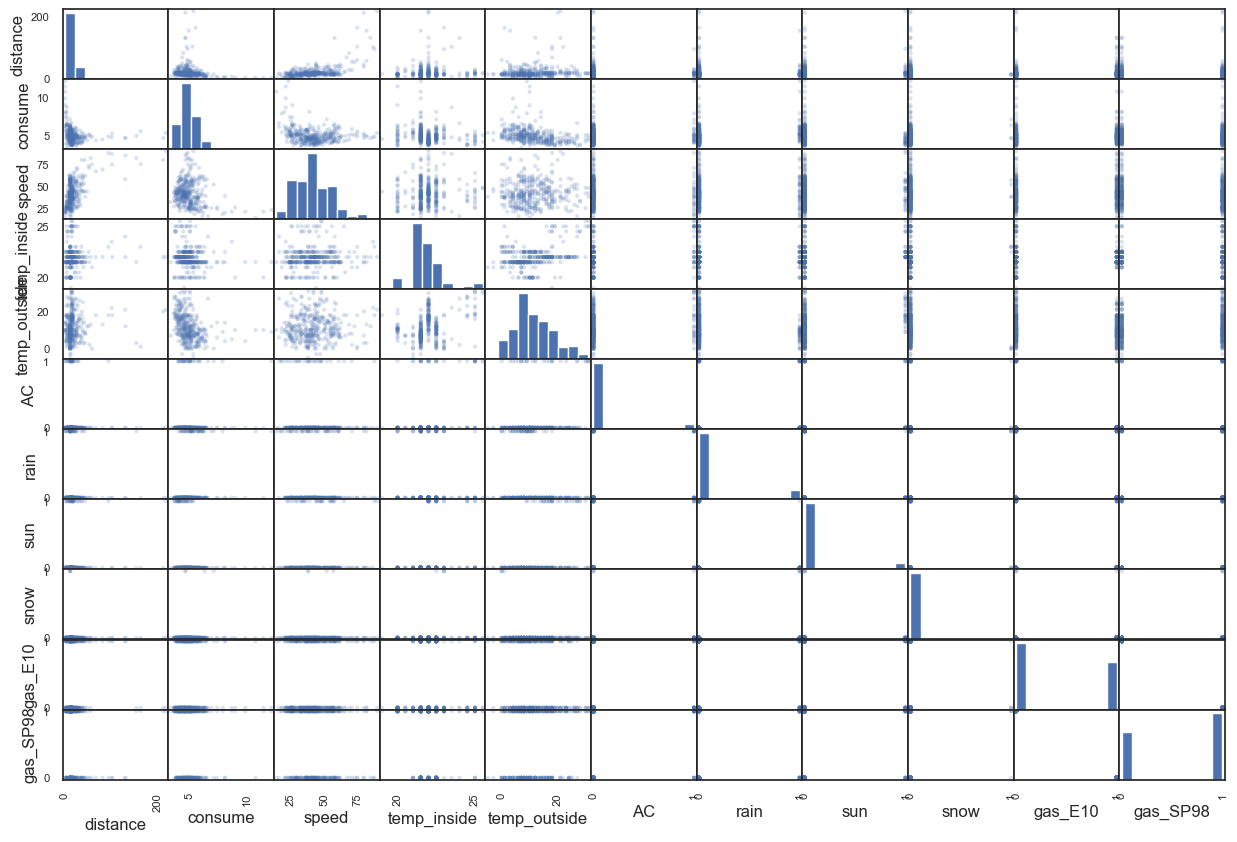

In [185]:
pd.plotting.scatter_matrix(data2, figsize=(15, 10), alpha=0.2);

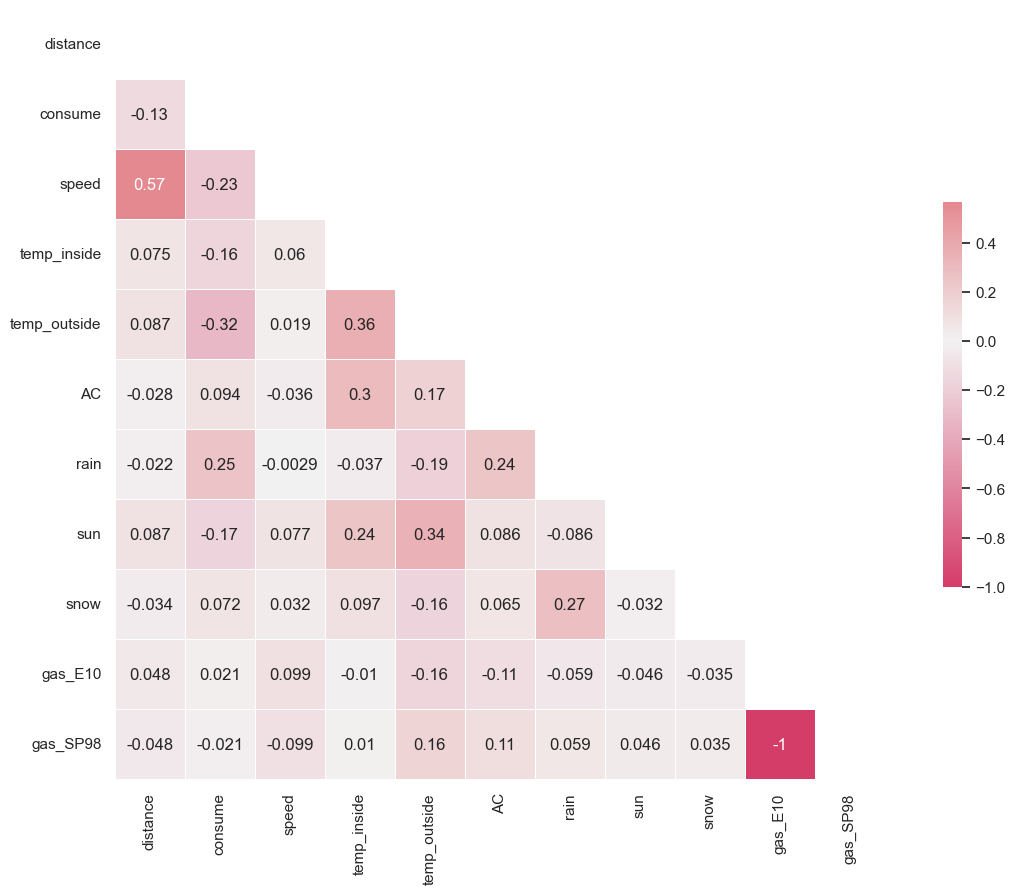

In [183]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(data2.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(data2.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

### Regression

In [186]:
X = data2.drop('consume', axis=1)

y = data2.consume

In [188]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 10), (76, 10), (300,), (76,))

#### normalize

In [193]:
escalador = StandardScaler()    
 
escalador.fit(X_train[['distance','speed','temp_inside','temp_outside']])   
 
X_train[['distance','speed','temp_inside','temp_outside']] = escalador.transform(X_train[['distance','speed','temp_inside','temp_outside']])   

In [ ]:
escalador.fit(y_train[['consume']])  

#### models

In [199]:
linreg = LinReg()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

In [200]:
linreg.fit(X_train, y_train)

LinearRegression()

In [201]:
linreg.intercept_ 

4.833689633816234

In [202]:
linreg.coef_   

array([ 0.07636575, -0.26247067, -0.07981251, -0.26176807,  0.45836688,
        0.5496338 , -0.1793898 , -0.06313343,  0.0122338 , -0.0122338 ])

In [204]:
#based on the paramether estimated, E10 increases the consumption 

dict(zip(X_train.columns, linreg.coef_))

{'distance': 0.07636574934150213,
 'speed': -0.26247066662345764,
 'temp_inside': -0.07981251355682839,
 'temp_outside': -0.26176807104703637,
 'AC': 0.458366876576371,
 'rain': 0.5496338029034401,
 'sun': -0.17938979746337472,
 'snow': -0.06313342929678319,
 'gas_E10': 0.012233801284414248,
 'gas_SP98': -0.012233801284414262}

In [205]:
#prediction
linreg.predict(X_test)[:10]

array([ -8.59087217, -14.63519706, -17.34928738, -15.33109305,
       -12.4147233 ,  -7.15570169,  -3.22259574, -14.06006972,
        -7.80036179,  -9.90022994])

In [207]:
y_pred = linreg.predict(X_test)

mse(y_test, y_pred, squared=False)

14.99621391361995